In [2]:
#| echo: false
import pandas as pd
red = pd.read_csv('winequality-red.csv', delimiter = ';')
white = pd.read_csv('winequality-white.csv', delimiter = ';')

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

For our project, we built a model to predict the quality of wine based on a variety of physicochemical variables. We were motivated to work on this problem since the quality of wine is something that is pretty subjective and qualitative, and we wanted to develop a model to make the process of assigning quality to wine more objective and repeatable. 

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. 

As mentioned above, our project focused primarily on developing a regression model to predict wine quality (for this particular dataset, this value is discrete and on a scale of 0-10). We used 11 predictors – which contained information on the physicochemical properties of various wine samples – to make this prediction. We wanted to minimize MAE, although we also took note of RMSE (our approach is discussed further in a later section).

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

We used the “Wine Quality Data Set” datasets from UC Irvine’s Machine Learning Repository. The data came in 2 datasets – one for red wine and one for white wine. Each dataset contained  11 continuous predictors (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulfates, alcohol) in addition to the response variable quality (which took on discrete integer values between 0 and 10). The link to download the data is http://www3.dsi.uminho.pt/pcortez/wine/  and the link to the source is https://archive.ics.uci.edu/ml/datasets/Wine+Quality 

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

We identified 3 key stakeholders. First, we believe that wine tasters will benefit from our model, as they can use predictions to test their ability to identify good quality wine and use the reported quality of wine as a good benchmark of comparison for testing their opinions against other industry opinions, since it is the median of three wine expert evaluations. Secondly, we believe that wine producers are a key stakeholder to consider. Using our model, wine producers can understand which of their wines is of the highest quality and price their products accordingly. Additionally, they can use this information to gauge customer and wine expert responses based on the predicted quality score for new or existing wine product offerings. Lastly, we believe that wine consumers will benefit from our model, since they can use our model to predict the quality of wine they are looking to purchase before buying it and judge the price of the wine relative to other wines of different or similar qualities to determine whether they are overpaying.

## Data quality check / cleaning / preparation 

Show the distribution of the response here. Report the standard deviation and mean in case of a regression problem, and proportion of 0s and 1s in case of classification.

For all other content, as mentioned below, just provide the highlights *(if any)* and put the details in the appendix.

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation. Its ok if there were none.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? Were there missing values? How did you handle them? Its ok if the data was already clean.

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your model(s).

standard deviation:  quality    0.873684
dtype: float64
mean of:  quality    5.817734
dtype: float64


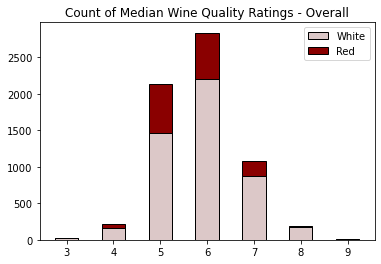

In [5]:
#| echo: false
import numpy as np
import matplotlib.pyplot as plt
value_counts = red['quality'].value_counts()
value_counts_white = white['quality'].value_counts()
quality = (
3, 4, 5, 6, 7, 8, 9
)
weight_counts = {
    "White": np.array([value_counts_white.iloc[5], value_counts_white.iloc[4], value_counts_white.iloc[1],
                      value_counts_white.iloc[0], value_counts_white.iloc[2], value_counts_white.iloc[3], value_counts_white.iloc[6]]),
        "Red": np.array([value_counts.iloc[5], value_counts.iloc[3], value_counts.iloc[0],
                      value_counts.iloc[1], value_counts.iloc[2], value_counts.iloc[4], 0])
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(quality))

colors = {
    "White": (220/255, 200/255, 200/255),  # RGB values for cream white
    "Red": (0.54, 0.0, 0.0)       # RGB values for dark red
}

for boolean, weight_count in weight_counts.items():
    p = ax.bar(quality, weight_count, width, label=boolean, bottom=bottom, color=colors[boolean], edgecolor='black')
    bottom += weight_count

ax.set_title("Count of Median Wine Quality Ratings - Overall")
ax.legend(loc = "upper right")
plt.savefig("response_distribution.png")

print('standard deviation: ', combined_train_y.std())
print('mean of: ', combined_train_y.mean())

plt.show()


As a result of the quality check, we decided to stratify our train-test splits with respect to the response as the values of the response were highly concentrated in the 5-7 range. With regard to cleaning, our data was already very clean with no missing values, so no cleaning was required. To prepare the data for developing our models, we combined the individual red and white wine data sets as one combined dataset to train our models on, and added a categorical variable that indicated whether the wine was red or white. We then converted this variable into two dummy variables: one for red wine and one for white wine. The distribution of values for each of the variables can be found in the appendix

## Exploratory data analysis

If there is any EDA that helped with model development, put it here. If EDA didn't help then mention that, and you may show your EDA effort *(if any)* in the appendix.

List the insights (as bullet points), if any, you got from EDA  that ended up being useful towards developing your final model. 

If there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

For our EDA, we visualized some of the predictors that we thought would be important against the response. Mainly due to the distribution of the response, this proved to be relatively unhelpful and we ultimately did find any useful insights from EDA. Thus, we decided that no transformations on predictor or response variables were needed, and the data was fine to use as is. Our EDA effort can be seen in the appendix.

## Approach

What kind of a models did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction accuracy or your chosen metric?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

For our approach, we each developed a model. The models we individually developed were MARS, Bagged Decision Trees, Random Forest, and XGBoost. We wanted to optimize both RMSE and MAE. We optimized RMSE because other people in our class section tried predicting wine quality using the same dataset, and we were advised to include RMSE as a way to compare our model accuracy against theirs. We also wanted to optimize MAE because we didn’t care about penalizing large errors in prediction, as that didn’t bear much contextual significance. There did exist solutions for this problem on Kaggle, however, many of these solutions focused on classification approaches rather than regression[1] problems and often used other models like LightGBM and CatBoost. In terms of ways that our approach might be considered unorthodox or new / how we built upon existing solutions on Kaggle, we firstly rounded all of our model predictions to be integers, as the response variable (wine quality) only takes on discrete, integer values between 0 and 10, and we wanted our model outputs to be realistic. We additionally combined the red and white wine datasets together and created a dummy variable in the combined dataset to indicate whether the wine was red or white. This allowed us to go beyond the predictors provided and use the type of wine (red or white) as a predictor. Our model RMSE/MAE is better than all the other groups who used the same dataset in our class section – and is also on par with the accuracy of models found online. However, we did notice that there were significantly less observations that had extremely low or extremely high ratings, and we wanted our model to account for that. In order to address this, we stratified. Beyond that, we didn’t encounter many problems, as our approach was pretty straightforward. 


## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### MARS
*By Cindy Wu*

For the MARS model, I tuned max_degrees and max_terms. Below are the values that I simultaneously tuned over. I started off with a lot of values for my initial search then used the results from the coarse grid to narrow down the values I searched for for my finer grid. Visualizing the MAE for each coarse grid value helped a lot in identifying the optimal range, since the graph(s) showed where the MAE was lowest for each hyperparameter value (vizualizations are in Code report).

**Coarse Grid:**
max_degrees = range(1,6)
max_terms = np.arange(10,100,20)

**Finer Grid:**
max_degrees = range(1,3)
max_terms = np.arange(9,15,1)

**Optimal hyperparameter values:**
max_degrees = 1
max_terms = 9

### Bagged Decision Trees
*By Michael Kim*

For the bagged decision trees model, I first went about the approach of seeing the number of trees after which minimal improvements to OOB MAE would be seen. The visualization in the code section yielded that any number of trees above approximately 100 would be sufficient, with the value later able to be increased afterwards in final models. The hyperparameters that I chose to focus on for tuning of the BaggingRegressor() with underlying base estimators of DecisionTreeRegressor() models were n_estimators, max_samples, max_features, bootstrap, and bootstrap_features. I did not choose to tune for any hyperparameters of the base estimators because it would be computationally expensive to do so in tuning hyperparameters of each individual tree and since our primary objective in bagging was to improve the performance of the ensemble, it was more efficient to focus on the tuning of these bagging-related hyperparameters. Two processes were done with this grid searches, one for scoring with MAE and one for scoring with RMSE. I initially used a grid of hyperparameter values to initially search over shown below as the coarse grid that was often used in this course as a starting point. For RMSE, the optimal hyperparameter values from this initial grid was bootstrap = False, bootstrap_features = False, max_features = 0.75, max_samples = 1.0, n_estimators = 100. For MAE, the optimal hyperparameter values from this initial grid was bootstrap = False, bootstrap_features = True, max_features = 1.0, max_samples = 1.0, n_estimators = 100. After getting the initial search results, since the values obtained were going to hit the boundaries of these values I initially searched over, I wanted to further fine tune the grid to search over to see if these were actually ideal values for hyperparameters. I continued to do more grid searches over new grids with the range of values centered around the optimal value found in the previous grid search for each hyperparameter, which allowed me to iteratively get closer to the hyperparameter values that obtained ideal cross-validated RMSE scores (although the search ended up being extremely fine, it was not computationally expensive enough to deter me from doing this). This approach was used and visualizations were found to not be necessary, instead just using new grids and grid searches to find optimal hyperparameter values for cross-validated metrics. For MAE, the optimal hyperparameter values were bootstrap = False, bootstrap_features = False, max_features = 0.675, max_samples = 0.995, and n_estimators = 100. For RMSE, the optimal hyperparameter values were bootstrap = False, bootstrap_features = False, max_features = 0.6, max_samples = 0.99, and n_estimators = 100. Using these hyperparameter value (and increasing n_estimators to 400), performances of test RMSE: 0.6563301233138936 and test MAE: 0.3556923076923077 were obtained and were used for ensembling (from optimizing for cross-validated RMSE).

**Coarse Grid:**
n_estimators: [100],
max_samples: [0.5, 0.75, 1.0],
max_features: [0.5, 0.75, 1.0],
bootstrap: [True, False],
bootstrap_features: [True, False]

**Finer Grid (scoring for RMSE):**
n_estimators: [100],
max_samples: [0.985, 0.99, 0.995],
max_features: [0.625, 0.65, 0.675],
bootstrap: [True, False],
bootstrap_features: [True, False]

**Finer Grid (scoring for MAE):**
n_estimators: [100],
max_samples: [0.99, 0.995, 1.0],
max_features: [0.65, 0.675, 0.7],
bootstrap: [True, False],
bootstrap_features: [True, False]

**Optimal hyperparameter values (for both scoring for MAE):**
n_estimators = 100
max_samples = 0.995
max_features = 0.675
bootstrap = False
bootstrap_features = False

**Optimal hyperparameter values (for both scoring for RMSE):**
n_estimators = 100
max_samples = 0.99
max_features = 0.6
bootstrap = False
bootstrap_features = False

### Random forest
*By Sabrina Kozarovitsky*

For the RandomForest model, I tuned n_estimators, max_features, max_depth, max_leaf_nodes, and bootstrap. Prior to tuning the model on the entire dataset, I began by tuning RandomForest models for only red wine and only white wine. I found that the most impactful hyperparameter on the white and red wine datasets was n_estimators. The other hyperparameters did not effect the RMSE greatly Thus, I began by using the optimal n_estimators from my red and white models as a starting point in the coarse grid for the combined dataset to save time and finely tuned it in later grids. As for the other hyperparameters, I chose very wide ranges. I ran a 5-fold GridSearchCV in order to find the most optimal hyperparameters based on MAE initially. However, in order to better compare our results to the other group's, I switched my final coarse GridSearchCV to optomize for RMSE. I continued to optomize RMSE throughout the hyperparameter tuning process because tuning for RMSE also gave a lower MAE than when tuning for MAE. After finding the optimal hyperparamters through a coarse grid search, I ran a finer grid seach with values closer to the optimal values given by the coarse search. If the coarse grid gave the default value, I kept the default value. In the end, the only hyperparameter that made a difference in the model performance was n_estimators so I continued to run finer and finer grids to find its most optimal value based on CV scores. My final, optimal hyperparameters were: n_estimators=910, random_state=1, max_features = 2, bootstrap = False, max_leaf_nodes = 1300, max_depth = None. These gave an RMSE of 0.6421119001448987 and an MAE of 0.3483076923076923 after rounding the predicted values to the nearest integer (as our y values were discrete).

**Coarse Grid:**
'n_estimators': [1000, 1350],
          'max_features': list(range(2,8,2)),
          'max_depth': [None,15,18],
          'max_leaf_nodes':[700,1000,1300],
          'bootstrap': [True, False]}
          
**Fine Grid:**
{'n_estimators': [900, 1000, 1050, 1100],
          'max_features': [1,2],
          'max_depth': [None],
          'max_leaf_nodes':[1000,1300],
          'bootstrap': [True, False]}
          
**Finer Grid:**
{'n_estimators': [900,925, 950, 1000],
          'max_features': [2],
          'max_depth': [None],
          'max_leaf_nodes':[1300],
          'bootstrap': [True, False]}
          
**Finest Grid:**
{'n_estimators': list(range(900,930,2)),
          'max_features': [2],
          'max_depth': [None],
          'max_leaf_nodes':[1300],
          'bootstrap': [True, False]}
          
**Optimal Hyperparameters:**
n_estimators=910, random_state=1, max_features = 2, bootstrap = False, max_leaf_nodes = 1300, max_depth = None

### XGBoost
*By Keaton Olds*

For the XGBoost model I tuned: gamma , learning_rate, max_depth, n_estimators, reg_lambda, subsample, and colsample_bytree. I decided to tune all of these hyperparamters to ensure a thorough tuning process that would produce the best XGBoost model. To tune these hyperparamters, I began with a coarse grid, followed that up with a fine grid, followed the grid up with manual tuning, and then adjusted the paramters to reduce overfitting; the values for these are all below. With both of the grid searches, I optimized them with respect to mean sqquared error as I found that doing so led to both the optimal RMSE and MAE when compared with optimizing for mean absolute error. With the coarse grid, I used RandomizedSearchCV with 5-fold cross validation. Through this search, I was able to select optimal values for n_estimators gamma, colsample_bytree, and subsample. I used these values in the fine grid search which I used to further narrow done values for learning_rate, reg_lambda, and max_depth. After selecting values for each of the parameters with the grid searches, I tested the model on the train data and got an RMSE of close to 0. I wanted to see if I could get the train RMSE to 0, so I tried manually tuning some of the hyperparamters on the train data, and I noticed learning_rate seemed to have an effect. To examine this relationship further, I visualized cross validation error versus learning rate, and found 0.05 to be an optimal learning rate for the train data. I implemented this change to the model, and tested it on the test data. This led to an RMSE of 0.657, which I wanted to see if I could get a little bit lower. As my train RMSE was 0.0, I figured my model was almost certaintly overfitting to the train data. To fix this, I lowered n_estimators, max_depth, and the subsample to increase bias and decrease variance, therefore correcting for overfitting. I decreased these metrics until my train RMSE was no longer 0.0, which yielded values of 300, 11, and 0.75 respectively. I decided to decrease n_estimators by that much because my visualization of MSE versus n_estimators after the coarse grid search showed that 1000 trees and 500 trees were very similar. Ultimately, this correction for overfitting yielded a final test RMSE of 0.644

**Coarse Grid:** max_depth:[4,6,8], n_estimators:[100,500,1000], learning_rate:[0.01, 0.05, 0.1], subsample:[0.5,0.75,1], colsample_bytree:[0.5,0.75,1], reg_lambda:[0,1,10], gamma:[0,10,100]

**Fine Grid:** max_depth:[8,9,10,11,12], n_estimators:[1000], learning_rate:[0.01, 0.03, 0.05], subsample:[1], colsample_bytree:[0.5], reg_lambda:[0,2,4,6,8], gamma:[0]

**Grid Search Final Params:** max_depth:[12], n_estimators:[1000], learning_rate:[0.01], subsample:[1], colsample_bytree:[0.5], reg_lambda:[2], gamma:[0]

**Manual Tuning on Train Data:** learning_rate = 0.05

**Overfitting Corrections:** max_depth = 11, n_estimators = 300, subsample = 0.75

**Optimal Hyperparameter Values:** max_depth = 11, n_estimators = 300, learning_rate = 0.05, subsample = 0.75, colsample_bytree = 0.5, reg_lambda = 2, gamma = 0

## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble

The simplest voting ensemble will be the model where all models have equal weights.

You may come up with innovative methods of estimating weights of the individual models, such as based on their cross-val error. Sometimes, these methods may work better than stacking ensembles, as stacking ensembles tend to overfit.

The voting ensemble with the best cross-validated RMSE and MAE scores was that that ensembled XGBRegressor(), RandomForestRegressor(), and BaggingRegressor() models. The ensemble model test RMSE was 0.6387487769068525 and the ensemble model test MAE was 0.3464615384615385, which was lower than all the individual models. However, the best VotingRegressor() model we found on test RMSE and MAE performance actually just ensembled XGBRegressor() and RandomForestRegressor() - however, because we can only choose the best model ensembling combination based on cross-validated metrics and not on test metrics which we wouldn't normally have access to, we chose the aforementioned VotingRegressor() that ensembled three models. We tested across combinations of the four individual models we tuned hyperparameters for, in addition to a simple LinearRegression() model for diversity.

### Stacking ensemble
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

We split up the stacking ensemble metamodels by individuals who trained each model (Michael - LinearRegression(), Cindy - MARS, Sabrina - Random Forest, Keaton - XGBRegressor). Additionally, similar to Voting Ensemble, we added in a simple LinearRegression() model as one of the models to be ensembled for diversity sakes. Because it would be too computationally expensive or did not add enough value in improvement to cross-validated metrics, we did not tune hyperparameters for most of the metamodels, except for random forest (tuning max_samples). The best performing StackingRegressor() ended up being that which ensembled the four individual models and the one LinearRegression() model using MARS model of Earth(max_degree = 1) as the metamodel. This yielded a test RMSE and MAE of 0.6397114734243629 and 0.3464615384615385, respectively. These scores were better than each of the models individual performance, but did not outperform the previous best VotingRegressor() model.

### Ensemble of ensembled models

If you are creating multiple stacking ensembles *(based on different metamodels)*, you may ensemble them.

We only used MARS with Earth(max_degree = 1) as the metamodel since this was the best performing one in the previous attempts at StackingRegressor() ensembling the individual models and also did not have as high of variance as other potential models to use as metamodels. This yielded a test RMSE = 0.6406727233631369 and test MAE =  0.3464615384615385. As such, this did not perform as well as the simple StackingRegressor() ensembling individual tuned models using a MARS metamodel nor the VotingRegressor() with just three of the individual models, which ultimately performed the best.

## Limitations of the model with regard to prediction

Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

For most of the individual models, we are confident that we found the optimal hyperparameter values. Specifically, for MARS, DecisionTreeRegressor(), and RandomForestRegressor() we have a high degree of confidence in this. Likely there might be some improvements possible for XGBRegressor() that were limited by the time we could spend on the course project. Further, there were likely further tuning of hyperparameters that would be computationally expensive but possibly yield improvements for our StackingRegressor() metamodels and some more tuning of those hyperparameters.
It will be possible for stakeholders to collect the data relating to the predictors in the model. Often times, wine samples will be obtained from labs for these same physicochemical properties to ensure consistency, with these able to be used as observations for our model with all predictors. Stakeholders can attempt to find a combination of predictor values that yields a higher quality and then attempt to synthesize a Vinho Verde wine with that combination of physicochemical properties. Although this is more difficult, another application could be testing for projected quality of wine to determine which wine to sell at higher prices, what the predicted consumer response to the wine will be, and other factors that quality of wine might impact. 
Our model will become too obsolete to be useful if the data available is not for Vinho Verde wine with the same physicochemical properties as predictors. Because the model was trained on Vinho Verde wine, any other wine would need to have a separate model trained on the same predictors with a different train dataset. Further, if wine has already been graded by wine experts in a qualitative manner, then this can still be supplemental to those evaluations but with its impact slightly diminished and possibly used more for corroboration of quality scores.

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

From this, we can conclude that by using physicochemical properties, wine consumers and critics can get a reasonably accurate standard of comparison for the quality of the wine (regardless of whether it is red or white). Our final model had a RMSE of 0.639 and MAE of 0.346, indicating that the average absolute error (difference between predictions and true values) is small enough to not round to another integer. In other words, our prediction accuracy is good enough to use! Additionally, we found that the physicochemical feature that is most important in predicting quality is the alcohol content.  The other features are also import

In terms of action items, given our model accuracy, Vinho Verde wine producers can input physicochemical property data for different wines into our predictive ensemble model and get wine quality predictions with absolute differences that round to a single quality score. Although the dataset is only applicable to Vinho Verde wines, using new data for other regional wine varieties with the same techniques can yield similar results and accuracy in predictions. Similarly, consumers and tasters of Vinho Verde wine can input  physicochemical property data for different wines into our predictive ensemble model and get an accurate understanding of the quality of wine they are drinking and/or purchasing. In general, we believe that our model is pretty interpretable and our recommendations are very implementable. 

Our model definitely is capable of being updated and is not only good for one-time use. It’s possible to continue updating the data with more ratings (since it’s currently only the median of three wine expert evaluations). So as more trusted wine expert evaluations are conducted, we can add that to our dataset and redevelop the model to make it more accurate to current industry ratings/trends. Given this approach and the ability for our model to continuously adapt and improve based on new information/ratings, our model can be used pretty far into the future.


Add details of each team member's contribution, other than the models contributed, in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Cindy Wu</td>
    <td>MARS</td>
    <td>Data cleaning and EDA</td>    
    <td>Checking for missing values, EDA, response distribution, and visualized data</td>
  </tr>
  <tr>
    <td>Michael Kim</td>
    <td>Bagged Decision Trees</td>
    <td>Ensembling of Models</td>    
    <td>Created voting ensemble models for different combinations and code layout for stacking regressor models and ensemble of ensembles</td>
  </tr>
    <tr>
    <td>Sabrina Kozarovitsky</td>
    <td>Random forest</td>
    <td>Feature importances and voting ensemble</td>    
    <td>Feature importances for predictors in each individual model and created initial voting ensemble based on all models</td>
  </tr>
    <tr>
    <td>Keaton Olds</td>
    <td>XGBoost</td>
    <td>Data Preparation</td>    
    <td>Transformed raw data into train and test CSVs used for the models</td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] jakubzenonkujawa. (2023, February 19). Wine Quality Prediction. Kaggle. Retrieved June 7, 2023, from https://www.kaggle.com/code/jakubzenonkujawa/wine-quality-prediction


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.

### Distribution of values

In [3]:
#red wine dataset
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
#white wine dataset
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Attempted EDA

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

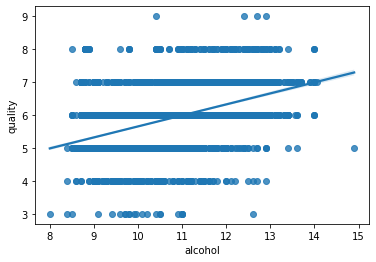

In [7]:
import seaborn as sns
sns.regplot(x = combined_train_x['alcohol'], y = combined_train_y)

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

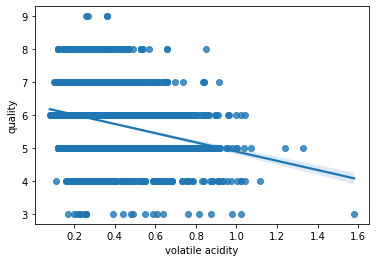

In [8]:
sns.regplot(x = combined_train_x['volatile acidity'], y = combined_train_y)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

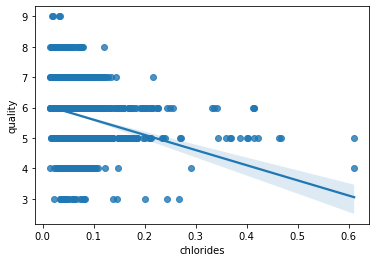

In [9]:
sns.regplot(x = combined_train_x['chlorides'], y = combined_train_y)

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

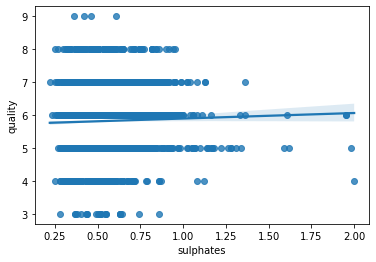

In [10]:
sns.regplot(x = combined_train_x['sulphates'], y = combined_train_y)